## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [43]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [44]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("../Starter_Code/Resources/bitstamp.csv"),
    index_col="Timestamp", parse_dates=True, infer_datetime_format=True)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [45]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [46]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("../Starter_Code/Resources/coinbase.csv"),
    index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [47]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [48]:
# For the bitstamp DataFNs or missing values in the DataFramerame, replace or drop all Na
bitstamp.dropna()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [49]:
# Use the str.replac[:,"Close"].str.replace("$","")e function to remove the dollar sign, $
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace("$","")
bitstamp

C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [50]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [51]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

In [52]:
# Using the drop_duplicates function, remove all the duplicate rows of data 
# from the DataFrame
bitstamp.drop_duplicates().sum()

Open              1.350040e+09
High              1.351715e+09
Low               1.348262e+09
Close             1.350020e+09
BTC Volume        1.522071e+06
USD Volume        1.519759e+10
Weighted Price    1.349961e+09
dtype: float64

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [53]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame or missing values in the DataFramerame, replace or drop all Na
coinbase.dropna()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [54]:
# Use the str.replac[:,"Close"].str.replace("$","")e function to remove the dollar sign, $
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase

C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [55]:
# Convert the Close data type to a float
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [56]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

In [57]:
# Remove all the duplicate rows of data from the DataFrame by Using the drop_duplicates function
coinbase.drop_duplicates().sum()

Open              1.351313e+09
High              1.352206e+09
Low               1.350364e+09
Close             1.351304e+09
BTC Volume        2.026030e+06
USD Volume        2.033672e+10
Weighted Price    1.351281e+09
dtype: float64

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [58]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [59]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,"Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [60]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [61]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

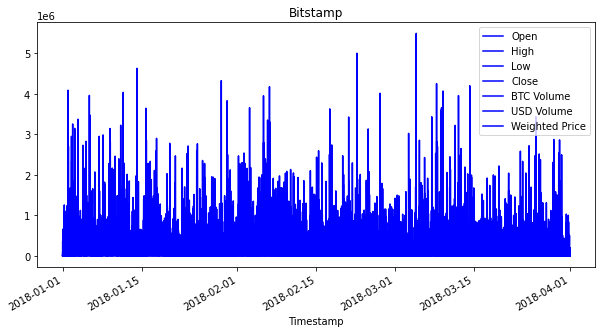

In [62]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

bitstamp.plot(figsize=(10,5), title="Bitstamp", color="Blue")


C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)
C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)
C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)
C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and suppo

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

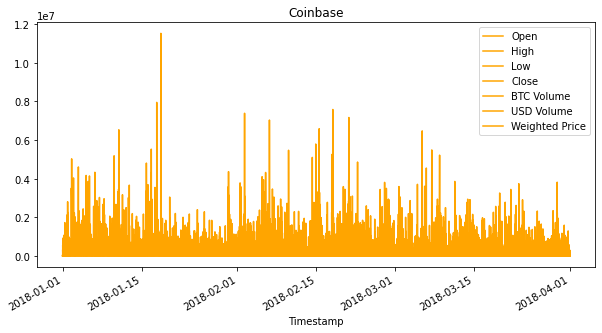

In [63]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

coinbase.plot(figsize=(10,5), title="Coinbase", Color="Orange")


C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)


<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

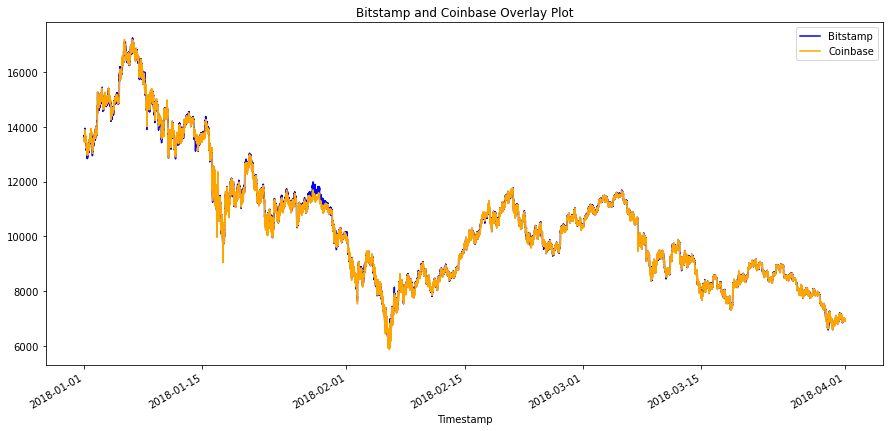

In [64]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HER
bitstamp['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp and Coinbase Overlay Plot", color="blue", label="Bitstamp")
coinbase['Close'].plot(legend=True, figsize=(15, 7), Color="orange", label="Coinbase")



C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)


<AxesSubplot:title={'center':'Exchange Comparison(Early Time Period)'}, xlabel='Timestamp'>

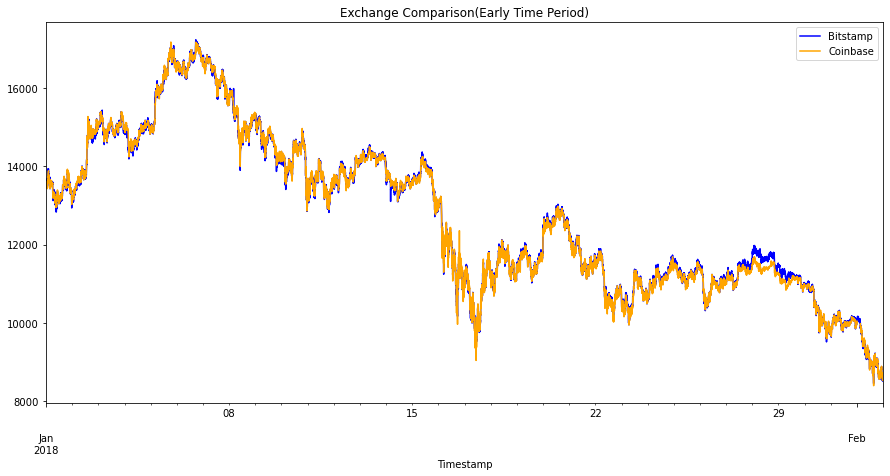

In [65]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 7), title="Exchange Comparison(Early Time Period)", 
                                                      color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 7), Color="orange", label="Coinbase")


C:\Users\meltm\anaconda3\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)


<AxesSubplot:title={'center':'Exchange Comparison(Later Time Period)'}, xlabel='Timestamp'>

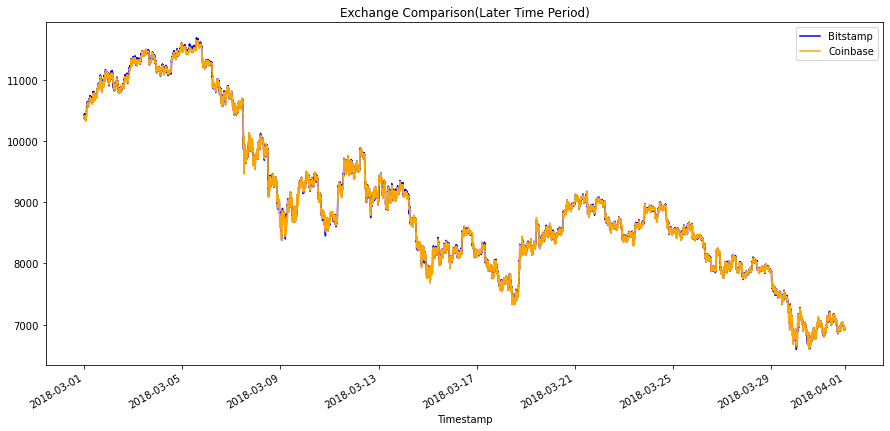

In [66]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

bitstamp['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15, 7), title="Exchange Comparison(Later Time Period)", 
                                                      color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15, 7), Color="orange", label="Coinbase")


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Jan 05,2018'}, xlabel='Timestamp'>

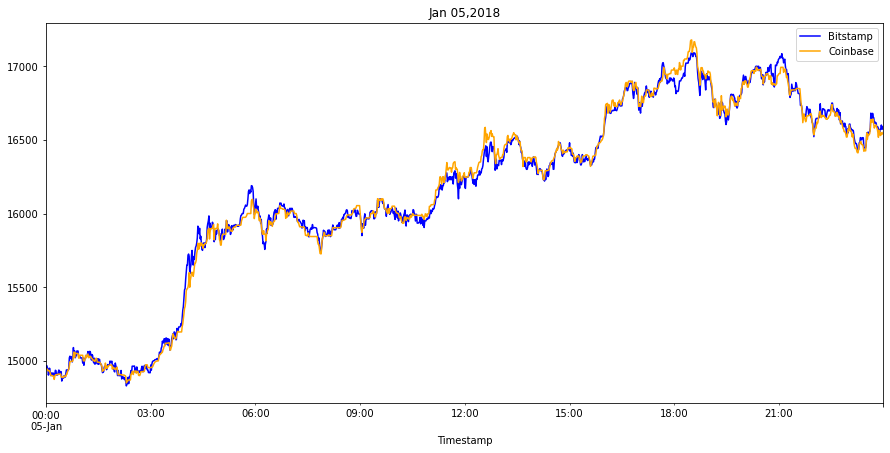

In [67]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp['Close'].loc['2018-01-05'].plot(legend=True, figsize=(15,7), title="Jan 05,2018", color="blue", label= "Bitstamp")
coinbase['Close'].loc['2018-01-05'].plot(legend=True, figsize=(15,7), color="orange", label="Coinbase")



In [68]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase['High'].loc['2018-01-05'] - bitstamp['Low'].loc['2018-01-05']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       31.246049
std        45.324761
min      -191.930000
25%         3.997500
50%        28.030000
75%        55.140000
max       182.450000
dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread-Early Date'}>

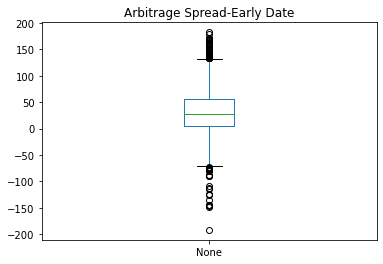

In [69]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", title="Arbitrage Spread-Early Date")

<AxesSubplot:title={'center':'Feb 12,2018'}, xlabel='Timestamp'>

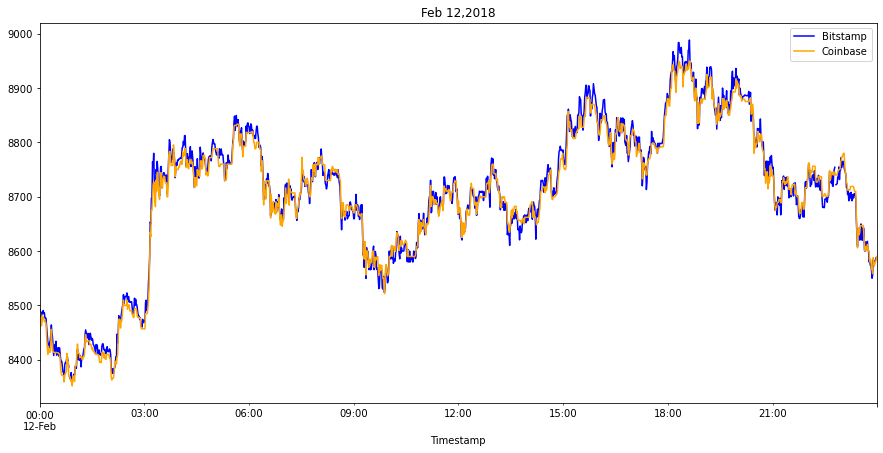

In [70]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp['Close'].loc['2018-02-12'].plot(legend=True, figsize=(15,7), title="Feb 12,2018", color="blue", label= "Bitstamp")
coinbase['Close'].loc['2018-02-12'].plot(legend=True, figsize=(15,7), color="orange", label="Coinbase")


In [71]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_middle = coinbase["High"].loc['2018-02-12'] - bitstamp["Low"].loc['2018-02-12']

# Generate summary statistics 

arbitrage_spread_middle.describe()


count    1436.000000
mean       10.282465
std        14.918168
min       -29.650000
25%        -0.072500
50%         9.475000
75%        19.760000
max        81.110000
dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread-Middle Date'}>

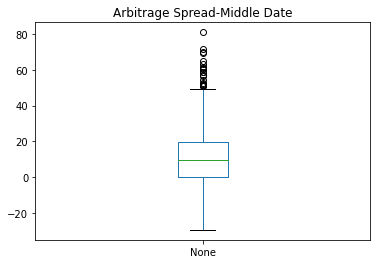

In [72]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot

arbitrage_spread_middle.plot(kind="box", title="Arbitrage Spread-Middle Date")


<AxesSubplot:title={'center':'Mar 27,2018'}, xlabel='Timestamp'>

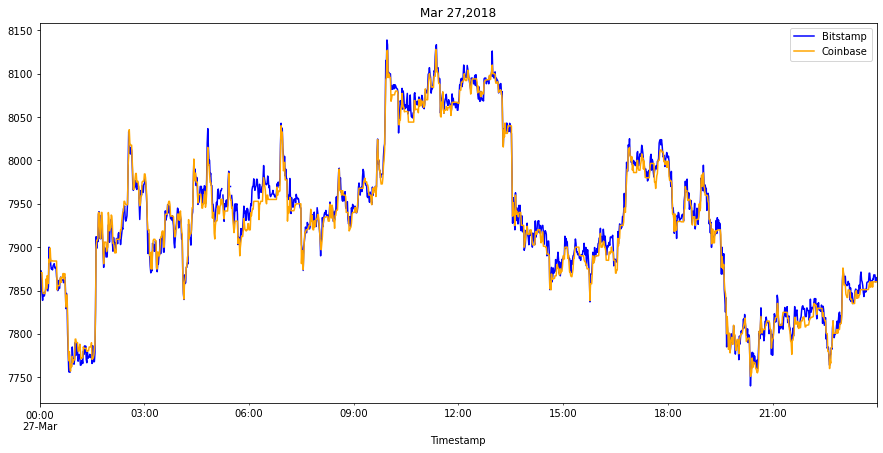

In [73]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp['Close'].loc['2018-03-27'].plot(legend=True, figsize=(15,7), title="Mar 27,2018", color="blue", label= "Bitstamp")
coinbase['Close'].loc['2018-03-27'].plot(legend=True, figsize=(15,7), color="orange", label="Coinbase")



In [74]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_late = coinbase["High"].loc['2018-03-27'] - bitstamp["Low"].loc['2018-03-27'] 

# Generate summary statistics for the late DataFrame

arbitrage_spread_late.describe()


count    1438.000000
mean        7.489277
std        11.540393
min       -24.150000
25%        -0.412500
50%         6.020000
75%        13.462500
max        69.960000
dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread-Later Date'}>

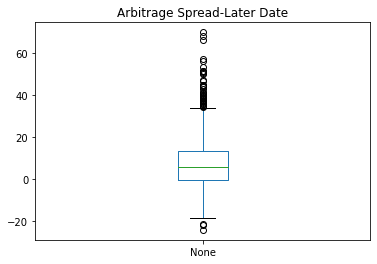

In [75]:
# Visualize the arbitrage spread from late in the dataset in a box plot

arbitrage_spread_late.plot(kind="box", title="Arbitrage Spread-Later Date")


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [88]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['High'].loc['2018-01-05'] - bitstamp['Low'].loc['2018-01-05']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       31.246049
std        45.324761
min      -191.930000
25%         3.997500
50%        28.030000
75%        55.140000
max       182.450000
dtype: float64

In [89]:
# For the middle date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase['High'].loc['2018-02-12'] - bitstamp['Low'].loc['2018-02-12']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle.describe()

count    1436.000000
mean       10.282465
std        14.918168
min       -29.650000
25%        -0.072500
50%         9.475000
75%        19.760000
max        81.110000
dtype: float64

In [90]:
# For the later date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_later = coinbase['High'].loc['2018-03-27'] - bitstamp['Low'].loc['2018-03-27']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_later.describe()

count    1438.000000
mean        7.489277
std        11.540393
min       -24.150000
25%        -0.412500
50%         6.020000
75%        13.462500
max        69.960000
dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [128]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp['Low'].loc['2018-01-05']

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-05 00:00:00         NaN
2018-01-05 00:01:00         NaN
2018-01-05 00:02:00         NaN
2018-01-05 00:03:00    0.000931
2018-01-05 00:04:00    0.002153
dtype: float64

In [126]:
# For the middle date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_middle = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp['Low'].loc['2018-02-12']

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-01-05 00:03:00   NaN
2018-01-05 00:04:00   NaN
2018-01-05 00:05:00   NaN
2018-01-05 00:06:00   NaN
2018-01-05 00:07:00   NaN
dtype: float64

In [127]:
# For the later date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_later= arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp['Low'].loc['2018-03-27']

# Review the spread return DataFrame
spread_return_later.head()

Timestamp
2018-01-05 00:03:00   NaN
2018-01-05 00:04:00   NaN
2018-01-05 00:05:00   NaN
2018-01-05 00:06:00   NaN
2018-01-05 00:07:00   NaN
dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [94]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades

profitable_trades_early.head()


Timestamp
2018-01-05 12:34:00    0.010891
2018-01-05 12:39:00    0.011142
2018-01-05 12:40:00    0.010223
2018-01-05 12:42:00    0.010477
2018-01-05 16:00:00    0.010142
dtype: float64

In [97]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Review the first five profitable trades

profitable_trades_middle.head()


Series([], dtype: float64)

In [96]:
# For the date later in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_later = spread_return_later[spread_return_later > 0.01]

# Review the first five profitable trades

profitable_trades_later.head()



Series([], dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [98]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    8.000000
mean     0.010400
std      0.000407
min      0.010059
25%      0.010127
50%      0.010202
75%      0.010581
max      0.011142
dtype: float64

In [99]:
# For the middle date in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [100]:
# For the later date in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_later.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [103]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-05']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_early.head()

Timestamp
2018-01-05 00:00:00   NaN
2018-01-05 00:01:00   NaN
2018-01-05 00:02:00   NaN
2018-01-05 00:03:00   NaN
2018-01-05 00:04:00   NaN
dtype: float64

In [104]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-12']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_middle.head()

Timestamp
2018-02-12 00:00:00   NaN
2018-02-12 00:01:00   NaN
2018-02-12 00:02:00   NaN
2018-02-12 00:03:00   NaN
2018-02-12 00:04:00   NaN
dtype: float64

In [105]:
# For the date later in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_later = profitable_trades_later * bitstamp['Close'].loc['2018-03-27']

# Drop any missing values from the profit DataFrame
profit_per_trade_later = profit_early.dropna()

# View the later profit DataFrame
profit_later.head()

Timestamp
2018-03-27 00:00:00   NaN
2018-03-27 00:01:00   NaN
2018-03-27 00:02:00   NaN
2018-03-27 00:03:00   NaN
2018-03-27 00:04:00   NaN
dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [106]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      8.000000
mean     172.515000
std        5.366635
min      167.150000
25%      169.582500
50%      170.585000
75%      173.750000
max      182.450000
dtype: float64

In [107]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [108]:
# Generate the summary statistics for the later profit per trade DataFrame
profit_per_trade_later.describe()

count      8.000000
mean     172.515000
std        5.366635
min      167.150000
25%      169.582500
50%      170.585000
75%      173.750000
max      182.450000
dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade-Early Date'}, xlabel='Timestamp'>

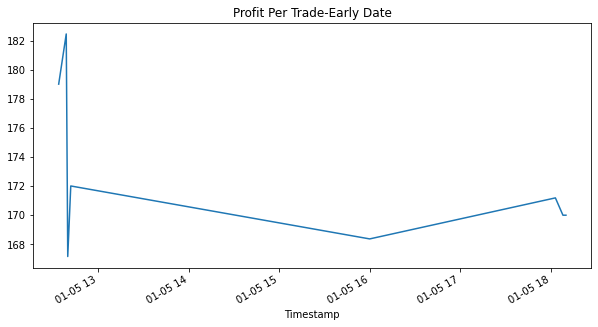

In [110]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,5), title="Profit Per Trade-Early Date")

<AxesSubplot:title={'center':'Profit Per Trade-Middle Date'}, xlabel='Timestamp'>

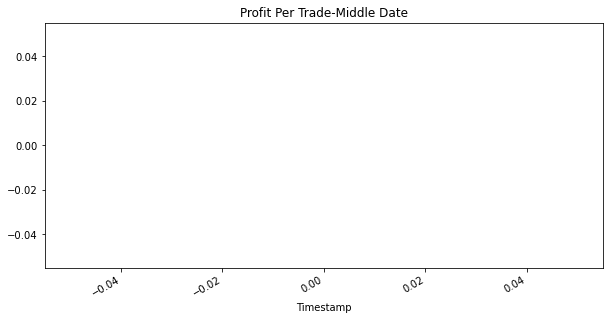

In [111]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10,5), title="Profit Per Trade-Middle Date")

<AxesSubplot:title={'center':'Profit Per Trade-Later Date'}, xlabel='Timestamp'>

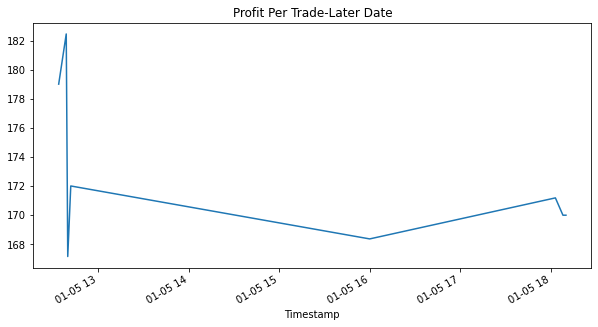

In [112]:
# Plot the results for the later profit per trade DataFrame
profit_per_trade_later.plot(figsize=(10,5), title="Profit Per Trade-Later Date")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [116]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame

profit_sum_early = profit_per_trade_early.sum()

In [117]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame

profit_sum_middle = profit_per_trade_middle.sum()

In [118]:
# Calculate the sum of the potential profits for the later profit per trade DataFrame

profit_sum_later = profit_per_trade_later.sum()

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [119]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum-Early Date'}, xlabel='Timestamp'>

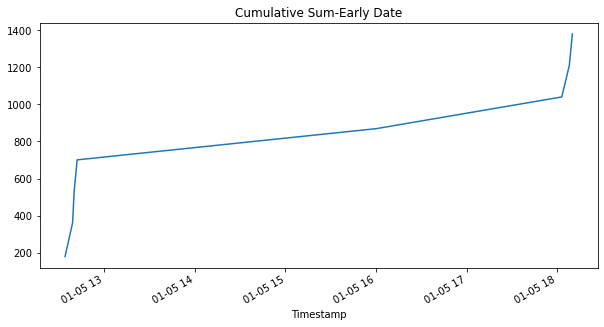

In [120]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,5), title="Cumulative Sum-Early Date")

In [121]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum-Middle Date'}, xlabel='Timestamp'>

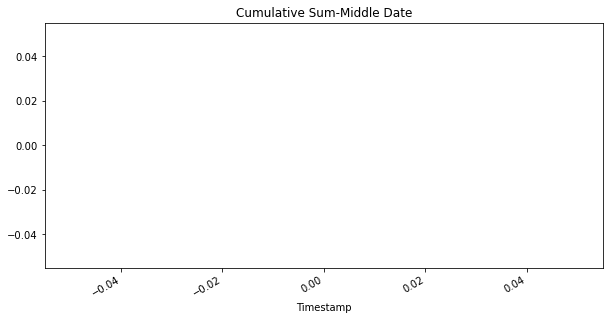

In [122]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10,5), title="Cumulative Sum-Middle Date")

In [123]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_later = profit_per_trade_later.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum-Later Date'}, xlabel='Timestamp'>

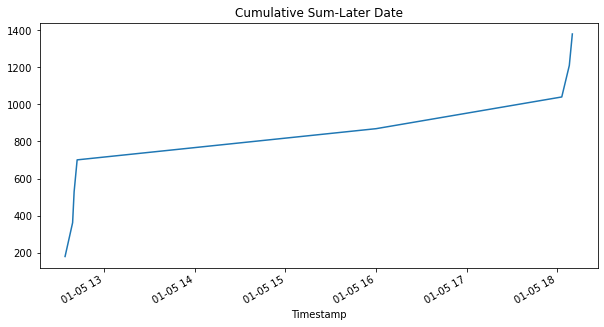

In [124]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_later.plot(figsize=(10,5), title="Cumulative Sum-Later Date")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE